In [1]:
import numpy as np
from elvecomputer import Computer
import collections

In [2]:
class Robot:
    
    def __init__(self, computer, start_panel=None, start_pos=None):
        if start_panel is None:
            start_panel = np.zeros((1000, 1000), dtype=np.bool)
        if start_pos is None:
            start_pos = (500, 500)
        self.panel = start_panel
        self.computer = computer
        self.pos = start_pos
        self.pos_update = collections.deque(
            [
                lambda pos : (pos[0] - 1, pos[1]), # up
                lambda pos : (pos[0], pos[1] - 1), # right
                lambda pos : (pos[0] + 1, pos[1]), # down
                lambda pos : (pos[0], pos[1] + 1), # left
            ]
        )
        self.fields_touched = set()
        
    def step(self):
        out = self.computer.run(self.panel[self.pos])
        if len(out) == 0:
            return 0
        self.panel[self.pos] = out.pop(0)
        self.fields_touched.add(self.pos)
        rotate = out.pop(0)
        if rotate:
            self.pos_update.rotate()
        else:
            self.pos_update.rotate(-1)
        self.pos = self.pos_update[0](self.pos)
        return 1
    
    def run(self):
        while self.step():
            pass

In [3]:
robot = Robot(
    Computer(np.loadtxt("input.txt", delimiter=",", dtype=np.int64))
)
robot.run()

In [4]:
len(robot.fields_touched)

2226

In [5]:
import matplotlib.pyplot as plt

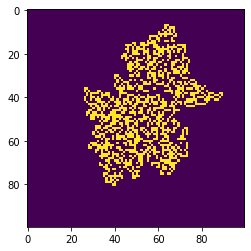

In [6]:
plt.imshow(robot.panel[450:550,460:560])

In [7]:
robot2 = Robot(
    Computer(np.loadtxt("input.txt", delimiter=",", dtype=np.int64)),
    start_panel=np.ones((1000, 1000), dtype=np.bool)
)
robot2.run()

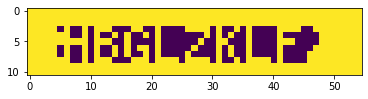

In [10]:
plt.imshow(robot2.panel[497:508,495:550])